# Joining Data with Pandas – `merge_ordered()` Method

## 1. Introduction to `merge_ordered()`
The `merge_ordered()` method in pandas is designed for **merging ordered or time-series data**.  
It behaves similarly to `merge()` but:
- **Sorts the results** automatically (important for chronological data).
- **Default join type** is `"outer"` instead of `"inner"`.
- Can fill missing values using **forward fill** or other fill methods.

---

## 2. Method Comparison – `merge()` vs. `merge_ordered()`

| Feature                     | `merge()`                      | `merge_ordered()`                |
|-----------------------------|---------------------------------|-----------------------------------|
| Default join type           | `"inner"`                      | `"outer"`                         |
| Sorted results              | Not by default                  | Always sorted                     |
| Works well for               | Any tabular merge               | Time-series / ordered merges      |
| Fill missing values option   | No                              | Yes (`fill_method`)               |
| Calling style                | `df1.merge(df2)`                | `pd.merge_ordered(df1, df2)`      |

Both methods:
- Accept `on`, `left_on`, `right_on` to choose join keys.
- Support join types (`left`, `right`, `inner`, `outer`).
- Support `suffixes` to handle overlapping column names.

---

## 3. Example Dataset – Stock Prices

We have two DataFrames:

**Apple (AAPL) Stock Prices – Feb to Jun 2007**
| date       | close     |
|------------|-----------|
| 2007-02-01 | 12.087143 |
| 2007-03-01 | 13.272857 |
| 2007-04-01 | 14.257143 |
| 2007-05-01 | 17.312857 |
| 2007-06-01 | 17.434286 |

**McDonald's (MCD) Stock Prices – Jan to May 2007**
| date       | close     |
|------------|-----------|
| 2007-01-01 | 44.349998 |
| 2007-02-01 | 43.689999 |
| 2007-03-01 | 45.049999 |
| 2007-04-01 | 48.279999 |
| 2007-05-01 | 50.549999 |

---

## 4. Merging Stock Data using `merge_ordered()`

```python
import pandas as pd

# Merge with merge_ordered
pd.merge_ordered(
    aapl, 
    mcd, 
    on='date', 
    suffixes=('_aapl','_mcd')
)
````

**Expected Output:**

| date       | close\_aapl | close\_mcd |
| ---------- | ----------- | ---------- |
| 2007-01-01 | NaN         | 44.349998  |
| 2007-02-01 | 12.087143   | 43.689999  |
| 2007-03-01 | 13.272857   | 45.049999  |
| 2007-04-01 | 14.257143   | 48.279999  |
| 2007-05-01 | 17.312857   | 50.549999  |
| 2007-06-01 | 17.434286   | NaN        |

### Explanation – Line by Line:

1. `import pandas as pd`
   Imports pandas library for data manipulation.

2. `pd.merge_ordered(...)`
   Calls the pandas function `merge_ordered()` directly, not as a DataFrame method.

3. `aapl, mcd`
   Left and right DataFrames to merge.

4. `on='date'`
   Merge key: aligns rows where the `date` matches.

5. `suffixes=('_aapl','_mcd')`
   Prevents column name conflicts by adding suffixes to overlapping column names (`close` becomes `close_aapl` and `close_mcd`).

**Why this matters:**

* This produces a **chronologically ordered** table.
* Missing values occur where one stock has no data for that month.

---

## 5. Forward Fill – Handling Missing Data

Forward fill (`ffill`) replaces missing values with the **previous available value** in the same column.

```python
pd.merge_ordered(
    aapl, 
    mcd, 
    on='date',
    suffixes=('_aapl','_mcd'),
    fill_method='ffill'
)
```

**Expected Output (Forward Filled):**

| date       | close\_aapl | close\_mcd |
| ---------- | ----------- | ---------- |
| 2007-01-01 | NaN         | 44.349998  |
| 2007-02-01 | 12.087143   | 43.689999  |
| 2007-03-01 | 13.272857   | 45.049999  |
| 2007-04-01 | 14.257143   | 48.279999  |
| 2007-05-01 | 17.312857   | 50.549999  |
| 2007-06-01 | 17.434286   | 50.549999  |

### Explanation – Additional Argument:

* `fill_method='ffill'`
  Fills each NaN with the previous non-NaN value **down the column**.

**Key Observation:**

* `close_mcd` for June 2007 was NaN before; now it is `50.549999` (from May 2007).
* `close_aapl` for January remains NaN because there’s no earlier value to copy.

---

## 6. When to Use `merge_ordered()`:

* **Time-series or ordered datasets** where row order matters.
* Need to merge while preserving **chronological order**.
* Want to **fill in missing values** after merge.
* Particularly useful before feeding data into **machine learning models**, which usually require no missing values.

---

## 7. Summary

* `merge_ordered()` is like `merge()` but **ordered** and **outer join by default**.
* Great for **financial data**, **sensor logs**, and **temporal merges**.
* Forward filling is a quick solution for handling gaps in ordered data.
* Remember: Always check whether forward filling is logically valid for your data.

```



### Exercise
Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named sp500, and gdp. As always, pandas has been imported for you as pd.
```python
1. Use merge_ordered() to merge gdp and sp500 using a left join where the year column from gdp is matched with the date column from sp500.
Print gdp_sp500.

# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

<script.py> output:
      country code  year        gdp    date  returns
    0          USA  2010  1.499e+13  2010.0    12.78
    1          USA  2011  1.554e+13  2011.0     0.00
    2          USA  2012  1.620e+13  2012.0    13.41
    3          USA  2012  1.620e+13  2012.0    13.41
    4          USA  2013  1.678e+13  2013.0    29.60
    5          USA  2014  1.752e+13  2014.0    11.39
    6          USA  2015  1.822e+13  2015.0    -0.73
    7          USA  2016  1.871e+13  2016.0     9.54
    8          USA  2017  1.949e+13  2017.0    19.42
    9          USA  2018  2.049e+13     NaN      NaN
    
    
    
2. Use the merge_ordered() function again, similar to before, to merge gdp and sp500, using the functions ability to fill in missing data for returns by forward-filling the missing values. Assign the resulting table to the variable gdp_sp500.

# Use merge_ordered() to merge gdp and sp500, and forward fill missing values
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left', fill_method= 'ffill')

# Print gdp_sp500
print (gdp_sp500)

<script.py> output:
      country code  year        gdp  date  returns
    0          USA  2010  1.499e+13  2010    12.78
    1          USA  2011  1.554e+13  2011     0.00
    2          USA  2012  1.620e+13  2012    13.41
    3          USA  2012  1.620e+13  2012    13.41
    4          USA  2013  1.678e+13  2013    29.60
    5          USA  2014  1.752e+13  2014    11.39
    6          USA  2015  1.822e+13  2015    -0.73
    7          USA  2016  1.871e+13  2016     9.54
    8          USA  2017  1.949e+13  2017    19.42
    9          USA  2018  2.049e+13  2017    19.42
    
 
3. Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
Print the correlation matrix of the gdp_returns table using the .corr() method.


# Use merge_ordered() to merge gdp and sp500, and forward fill missing values
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())




<script.py> output:
               gdp  returns
    gdp      1.000    0.212
    returns  0.212    1.000
In [1]:
```

### Exercise
Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables unemployment and inflation have been loaded for you.

Instructions

Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.

Print the inflation_unemploy dataframe.

Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.

```python

# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered( inflation, unemployment,
                     on='date',how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind= 'scatter', x='unemployment_rate', y='cpi')
plt.show()


<script.py> output:
             date      cpi     seriesid                  data_type  unemployment_rate
    0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                6.7
    1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                6.1
    2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.6
    3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.3
    4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                5.0
    5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.9
    6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.7
    7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.3
    8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.1
    9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX                4.0
    
```
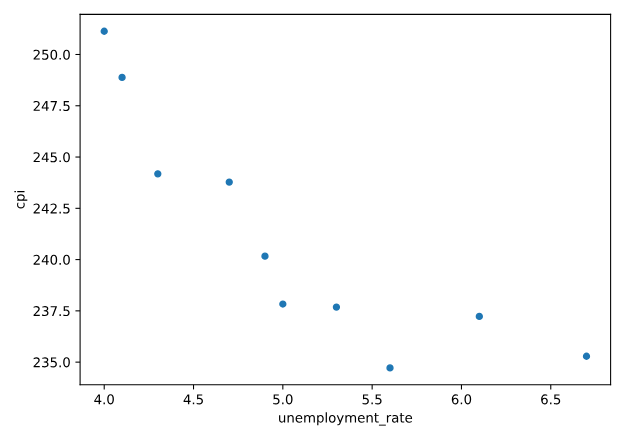

### Exercise
merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables gdp and pop have been loaded.

1.Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.
```python

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date','country'], 
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)


<script.py> output:
             date    country         gdp  series_code_x       pop series_code_y
    0  1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
    1  1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    2  1990-04-01  Australia  158263.582  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    3  1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    4  1990-07-01  Australia  157329.279  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    5  1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    6  1990-09-01  Australia  158240.678  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    7  1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    8  1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
    9  1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    10 1991-04-01  Australia  155989.033  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    11 1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    12 1991-07-01  Australia  156635.858  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    13 1991-07-01     Sweden   79084.770  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    14 1991-09-01  Australia  156744.057  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    15 1991-09-01     Sweden   79740.606  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    16 1992-01-01  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
    17 1992-01-01     Sweden   79390.922  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    18 1992-04-01  Australia  159047.827  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    19 1992-04-01     Sweden   79060.283  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    20 1992-07-01  Australia  160658.176  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    21 1992-07-01     Sweden   78904.605  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    22 1992-09-01  Australia  163960.221  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    23 1992-09-01     Sweden   76996.837  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    24 1993-01-01  Australia  165097.495  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
    25 1993-01-01     Sweden   75783.588  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    26 1993-04-01  Australia  166027.059  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    27 1993-04-01     Sweden   76708.548  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    28 1993-07-01  Australia  166203.179  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    29 1993-07-01     Sweden   77662.018  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    30 1993-09-01  Australia  169279.348  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    31 1993-09-01     Sweden   77703.304  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    
    

    
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country','date'], 
                             fill_method='ffill')

# Print date_ctry
print(date_ctry)
    
    
<script.py> output:
             date    country         gdp  series_code_x       pop series_code_y
    0  1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
    1  1990-04-01  Australia  158263.582  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
    2  1990-07-01  Australia  157329.279  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
    3  1990-09-01  Australia  158240.678  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
    4  1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
    5  1991-04-01  Australia  155989.033  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
    6  1991-07-01  Australia  156635.858  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
    7  1991-09-01  Australia  156744.057  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
    8  1992-01-01  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
    9  1992-04-01  Australia  159047.827  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
    10 1992-07-01  Australia  160658.176  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
    11 1992-09-01  Australia  163960.221  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
    12 1993-01-01  Australia  165097.495  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
    13 1993-04-01  Australia  166027.059  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
    14 1993-07-01  Australia  166203.179  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
    15 1993-09-01  Australia  169279.348  NYGDPMKTPSAKD  17667000   SP.POP.TOTL
    16 1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    17 1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    18 1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    19 1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
    20 1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    21 1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    22 1991-07-01     Sweden   79084.770  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    23 1991-09-01     Sweden   79740.606  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
    24 1992-01-01     Sweden   79390.922  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    25 1992-04-01     Sweden   79060.283  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    26 1992-07-01     Sweden   78904.605  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    27 1992-09-01     Sweden   76996.837  NYGDPMKTPSAKD   8668067   SP.POP.TOTL
    28 1993-01-01     Sweden   75783.588  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    29 1993-04-01     Sweden   76708.548  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    30 1993-07-01     Sweden   77662.018  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
    31 1993-09-01     Sweden   77703.304  NYGDPMKTPSAKD   8718561   SP.POP.TOTL
```



# Joining Data with Pandas – `merge_asof()`

## 1. Introduction to `merge_asof()`
- **Purpose**: Combines two ordered datasets (often time-series) by matching on the **nearest** key rather than exact matches.
- **Similarity**: Works like `merge_ordered()` with `how="left"`.
- **Key Difference**: Instead of requiring exact matches on the merge key, `merge_asof()` finds:
  - The **last row** in the right table where the key ≤ key in the left table (default: backward).
- **Requirement**: The column(s) used in `on` **must be sorted** in ascending order.

---

## 2. How Matching Works
- Default behavior: "backward"
  - For each row in the left DataFrame, find the closest key **less than or equal** to the left key in the right DataFrame.
- Example:
  - Left key: `5`
  - Right keys: `1, 3, 7`
  - Match: `3` (since it’s the closest ≤ 5).

---

## 3. Example Data

**Visa stock prices (hourly, Nov 17, 2017)**

| date_time           | close     |
|---------------------|-----------|
| 2017-11-17 16:00:00 | 110.32    |
| 2017-11-17 17:00:00 | 110.24    |
| 2017-11-17 18:00:00 | 110.065   |
| 2017-11-17 19:00:00 | 110.04    |
| 2017-11-17 20:00:00 | 110.0     |
| 2017-11-17 21:00:00 | 109.9966  |
| 2017-11-17 22:00:00 | 109.82    |

**IBM stock prices (≈ every 5 mins, Nov 17, 2017)**

| date_time           | close   |
|---------------------|---------|
| 2017-11-17 15:35:12 | 149.30  |
| 2017-11-17 15:40:34 | 149.13  |
| 2017-11-17 15:45:50 | 148.98  |
| 2017-11-17 15:50:20 | 148.99  |
| 2017-11-17 15:55:10 | 149.11  |
| 2017-11-17 16:00:03 | 149.25  |
| 2017-11-17 16:05:06 | 149.51  |
| 2017-11-17 16:10:12 | 149.57  |
| 2017-11-17 16:15:30 | 149.59  |
| 2017-11-17 16:20:32 | 149.82  |
| 2017-11-17 16:25:47 | 149.96  |

---

## 4. Basic `merge_asof()` Example

```python
import pandas as pd

# Merge Visa and IBM on nearest earlier (or equal) date_time
merged_default = pd.merge_asof(
    visa, ibm,
    on='date_time',
    suffixes=('_visa', '_ibm')
)

merged_default
````

**Output:**

```output
            date_time  close_visa  close_ibm
0 2017-11-17 16:00:00   110.3200    149.11
1 2017-11-17 17:00:00   110.2400    149.83
2 2017-11-17 18:00:00   110.0650    149.59
3 2017-11-17 19:00:00   110.0400    149.50
4 2017-11-17 20:00:00   110.0000    149.42
5 2017-11-17 21:00:00   109.9966   149.26
6 2017-11-17 22:00:00   109.8200    148.97
```

**Explanation (line-by-line)**:

1. `import pandas as pd`

   * Load Pandas library for data manipulation.
2. `pd.merge_asof(...)`

   * Perform the as-of merge:

     * `visa` → left DataFrame.
     * `ibm` → right DataFrame.
     * `on='date_time'` → join key.
     * `suffixes=('_visa','_ibm')` → avoid column name collisions.
3. **Output Meaning**:

   * Every Visa time matches to the **most recent IBM time ≤ Visa time**.
   * Example: `2017-11-17 16:00:00 (Visa)` matched IBM’s `2017-11-17 15:55:10` (close 149.11).

---

## 5. Using the `direction` Argument

By default:

* `direction="backward"` → matches earlier/equal right keys.

Other options:

* `"forward"` → matches the **next** available key ≥ left key.
* `"nearest"` → matches whichever is closer, before or after.

### Example with `direction="forward"`

```python
merged_forward = pd.merge_asof(
    visa, ibm,
    on='date_time',
    suffixes=('_visa', '_ibm'),
    direction='forward'
)

merged_forward
```

**Output:**

```output
            date_time  close_visa  close_ibm
0 2017-11-17 16:00:00   110.3200    149.25
1 2017-11-17 17:00:00   110.2400    149.61
2 2017-11-17 18:00:00   110.0650    149.59
3 2017-11-17 19:00:00   110.0400    149.50
4 2017-11-17 20:00:00   110.0000    149.42
5 2017-11-17 21:00:00   109.9966   149.26
6 2017-11-17 22:00:00   109.8200    148.97
```

**Explanation (changes)**:

* Row 0 now matched IBM `2017-11-17 16:00:03` instead of earlier `15:55:10`.
* This happens because `"forward"` takes the **first right key ≥ left key**.

---

## 6. When to Use `merge_asof()`

* **Irregular time series**:

  * Matching events from different sampling frequencies.
* **Avoiding data leakage**:

  * When building a training set, ensure no “future” information is merged into the past.
* **Nearest timestamp matching**:

  * E.g., IoT sensor logs, financial ticks, system events.

---

## 7. Key Takeaways

* `merge_asof()` is ideal for **time-aligned joins** without exact timestamp matches.
* Always **sort** the `on` column first.
* Use `direction` to control whether to match to past, future, or nearest events.
* Prevents using data that hasn't occurred yet in time-series modeling.

---



### Exercise
Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.


Instructions

Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.

Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.

Plot the close prices of close_jpm, close_wells, and close_bac from price_diffs.


```python

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time'
                          ,suffixes=('', '_wells'), direction='nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm','_bac'), direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

```
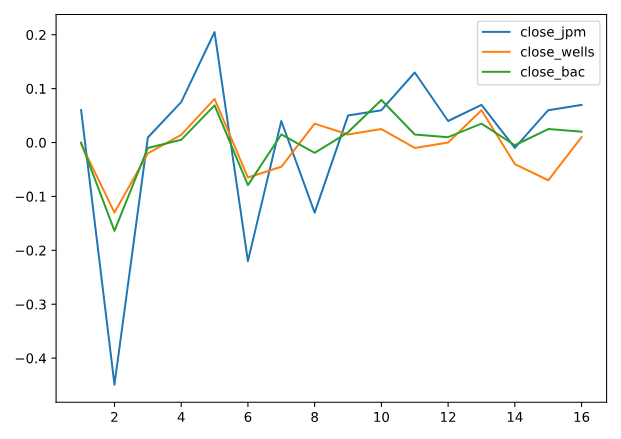


### Exercise
Using merge_asof() to create dataset
The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables gdp and recession have been loaded for you.

Instructions

Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.

Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.

Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

```python

# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(left=gdp, right= recession, on='date', direction='backward')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

```
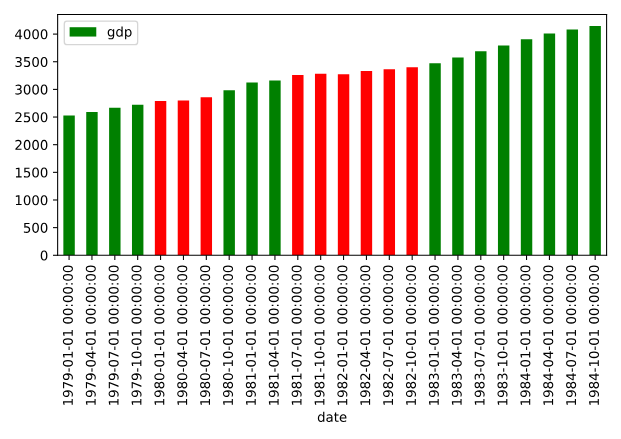

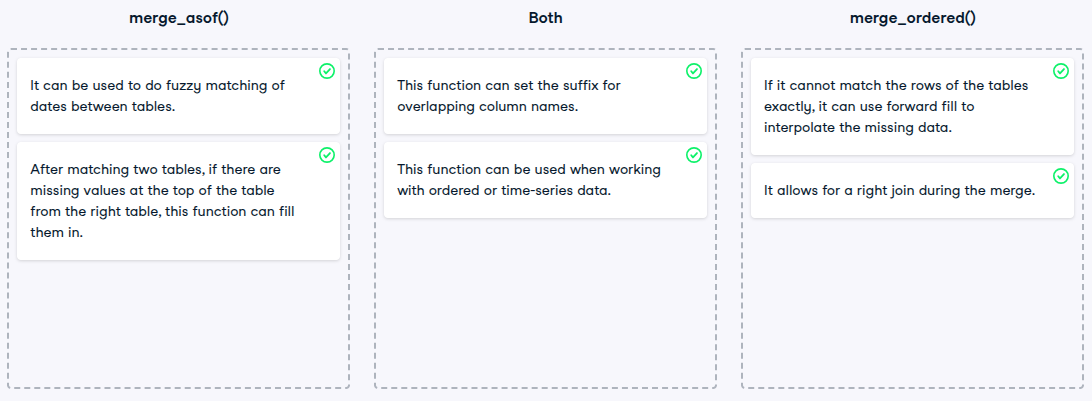



# Selecting Data with `.query()` in Pandas

The `.query()` method in Pandas allows you to **filter rows in a DataFrame** using a simple string expression, similar to SQL's `WHERE` clause.  
It is powerful because:
- It accepts a **string** describing your filtering condition(s).
- Conditions can be based on **numbers**, **text**, or both.
- Supports **logical operators**: `and`, `or`.
- Works with **multiple columns** at once.

---

## 1. Querying on a Single Condition

We start with a `stocks` DataFrame showing Disney and Nike stock prices by date.

```python
stocks.query('nike >= 90')
````

**Explanation**:

* `'nike >= 90'` means: select only rows where the value in the `nike` column is **90 or higher**.
* The method returns a **new DataFrame** with only those matching rows (original data is unchanged).

**Expected Output**:

|   | date       | disney     | nike       |
| - | ---------- | ---------- | ---------- |
| 2 | 2019-09-01 | 130.320007 | 93.919998  |
| 4 | 2019-11-01 | 151.580002 | 93.489998  |
| 5 | 2019-12-01 | 144.630005 | 101.309998 |
| 6 | 2020-01-01 | 138.309998 | 96.300003  |

**Memory Tip** 💡: Think of `.query()` as "talking" to your data in plain English.

---

## 2. Querying on Multiple Conditions (`and`, `or`)

We can combine conditions using:

* `and` → both must be true
* `or` → at least one must be true

### Example 1: Using `and`

```python
stocks.query('nike > 90 and disney < 140')
```

Meaning: Select rows where **Nike > 90** *and* **Disney < 140**.

**Expected Output**:

|   | date       | disney     | nike      |
| - | ---------- | ---------- | --------- |
| 2 | 2019-09-01 | 130.320007 | 93.919998 |
| 6 | 2020-01-01 | 138.309998 | 96.300003 |

---

### Example 2: Using `or`

```python
stocks.query('nike > 96 or disney < 98')
```

Meaning: Select rows where **Nike > 96** *or* **Disney < 98**.

**Expected Output**:

|   | date       | disney     | nike       |
| - | ---------- | ---------- | ---------- |
| 5 | 2019-12-01 | 144.630005 | 101.309998 |
| 6 | 2020-01-01 | 138.309998 | 96.300003  |
| 8 | 2020-03-01 | 96.599998  | 82.739998  |

**Memory Tip** 💡: Use parentheses if your `and` / `or` logic gets complex — it avoids confusion.

---

## 3. Querying with Text Conditions

When working with text data (strings), you can still use `.query()`.

Updated `stocks_long` format:

| date       | stock  | close      |
| ---------- | ------ | ---------- |
| 2019-07-01 | disney | 143.009995 |
| 2019-08-01 | disney | 137.259995 |
| ...        | ...    | ...        |
| 2019-11-01 | nike   | 93.489998  |

### Example: Select Disney OR Nike with close < 90

```python
stocks_long.query('stock == "disney" or (stock == "nike" and close < 90)')
```

**Explanation**:

* `stock == "disney"` → all Disney rows
* `(stock == "nike" and close < 90)` → Nike rows where price is below 90
* **Double quotes** are used around `"disney"` and `"nike"` because the whole query string uses single quotes `'...'`.

**Expected Output**:

|   | date       | stock  | close      |
| - | ---------- | ------ | ---------- |
| 0 | 2019-07-01 | disney | 143.009995 |
| 1 | 2019-08-01 | disney | 137.259995 |
| 2 | 2019-09-01 | disney | 130.320007 |
| 3 | 2019-10-01 | disney | 129.919998 |
| 4 | 2019-11-01 | disney | 151.580002 |
| 5 | 2019-07-01 | nike   | 86.029999  |
| 6 | 2019-08-01 | nike   | 84.5       |
| 8 | 2019-10-01 | nike   | 89.550003  |

---

## Key Takeaways

| Concept                | Example Code                           | Description                            |
| ---------------------- | -------------------------------------- | -------------------------------------- |
| Single condition       | `.query('nike >= 90')`                 | Filter rows where one condition is met |
| Multiple with `and`    | `.query('nike > 90 and disney < 140')` | Both conditions must be true           |
| Multiple with `or`     | `.query('nike > 96 or disney < 98')`   | At least one condition must be true    |
| Text matching          | `.query('stock == "disney"')`          | Match specific text values in columns  |
| Grouping complex logic | Use `( ... )`                          | Controls order of condition checking   |

**Non-tech tip** 📝: Pretend `.query()` is you asking your table:
*"Hey table, show me only the rows where X happens."*
It answers by giving you just those rows — nothing more, nothing less.

```




### Exercise
Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you.

1. Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.

```python
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')


2. Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

 

3. Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', index= 'date', columns='country')


4. Use .query() to select rows from gdp_pivot where date is greater than equal to "1991-01-01". Save as recent_gdp_pop.


# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= 1991')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

```
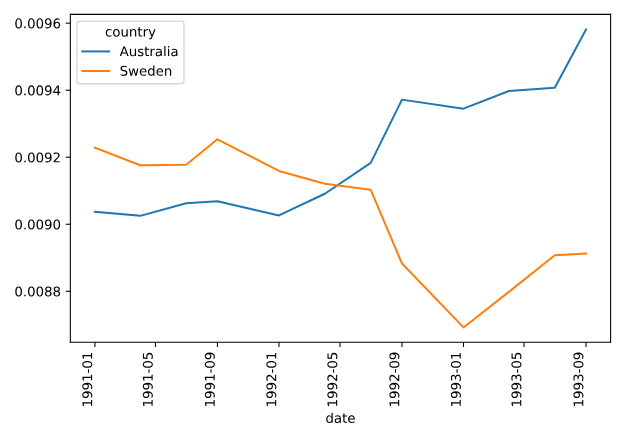




# 📘 Reshaping Data with `.melt()` — Joining Data with pandas

---

## 1. Introduction to `.melt()`
- **Purpose**: The `.melt()` method in pandas **reshapes data from wide format to long format**.
- **Why important**:
  - Wide format → human-friendly but less flexible for computations.
  - Long format → computer-friendly, easier for aggregation, plotting, and analysis.
- **Key concept**:  
  - **Wide format**: One row per subject, many columns for attributes.
  - **Long format**: Multiple rows per subject, fewer columns, with one column for attribute name and another for value.

---

## 2. Wide vs. Long Data
- **Wide Data**:
  - Example: Columns for 2016, 2017, 2018, 2019 (all in same row for a company).
  - Easier for humans to read.
- **Long Data**:
  - Example: Separate rows for each year, with columns `year` and `value`.
  - Easier for computers to process.
- `.melt()` **un-pivots** data → transforms from wide → long.

---

## 3. What `.melt()` Does
- Takes selected columns (usually identifiers) and keeps them fixed.
- Turns the other columns into **two columns**:
  - **Variable column**: Contains previous column names.
  - **Value column**: Contains the corresponding values.

---

## 4. Dataset in Wide Format
Example table (`social_fin`) before melting:

| financial     | company   | 2019      | 2018      | 2017      | 2016      |
|---------------|-----------|-----------|-----------|-----------|-----------|
| total_revenue | twitter   | 3459329   | 3042359   | 2443299   | 2529619   |
| gross_profit  | twitter   | 2322288   | 2077362   | 1582057   | 1597379   |
| net_income    | twitter   | 1465659   | 1205596   | -108063   | -456873   |
| total_revenue | facebook  | 70697000  | 55838000  | 40653000  | 27638000  |
| ...           | ...       | ...       | ...       | ...       | ...       |

---

## 5. Basic `.melt()` Example

```python
social_fin_tall = social_fin.melt(id_vars=['financial', 'company'])
print(social_fin_tall.head(10))
````

### Output:

```
      financial  company variable     value
0  total_revenue  twitter     2019   3459329
1   gross_profit  twitter     2019   2322288
2     net_income  twitter     2019   1465659
3  total_revenue facebook     2019  70697000
4   gross_profit facebook     2019  57927000
5     net_income facebook     2019  18485000
6  total_revenue  twitter     2018   3042359
7   gross_profit  twitter     2018   2077362
8     net_income  twitter     2018   1205596
9  total_revenue facebook     2018  55838000
```

### Explanation:

* `id_vars=['financial', 'company']`:

  * These columns remain unchanged (identifiers).
* All other columns (`2019`, `2018`, `2017`, `2016`) are **unpivoted** into:

  * **variable**: Former column names (years).
  * **value**: Corresponding numeric values.

**Why useful**:
Now, instead of multiple year columns, we have a single column for year values — great for filtering, grouping, and plotting.

---

## 6. Melting with `value_vars`

You can choose which columns to unpivot.

```python
social_fin_tall = social_fin.melt(
    id_vars=['financial', 'company'],
    value_vars=['2018', '2017']
)
print(social_fin_tall.head(9))
```

### Output:

```
      financial  company variable     value
0  total_revenue  twitter     2018   3042359
1   gross_profit  twitter     2018   2077362
2     net_income  twitter     2018   1205596
3  total_revenue facebook     2018  55838000
4   gross_profit facebook     2018  46483000
5     net_income facebook     2018  22112000
6  total_revenue  twitter     2017   2443299
7   gross_profit  twitter     2017   1582057
8     net_income  twitter     2017   -108063
```

### Explanation:

* `value_vars=['2018','2017']`:

  * Only these columns are unpivoted.
* Order is preserved: first `2018`, then `2017`.
* Result still has `variable` and `value` as default column names.

---

## 7. Melting with Custom Column Names

To make output more readable:

```python
social_fin_tall = social_fin.melt(
    id_vars=['financial', 'company'],
    value_vars=['2018', '2017'],
    var_name='year',
    value_name='dollars'
)
print(social_fin_tall.head(8))
```

### Output:

```
      financial  company  year  dollars
0  total_revenue  twitter  2018  3042359
1   gross_profit  twitter  2018  2077362
2     net_income  twitter  2018  1205596
3  total_revenue facebook  2018 55838000
4   gross_profit facebook  2018 46483000
5     net_income facebook  2018 22112000
6  total_revenue  twitter  2017  2443299
7   gross_profit  twitter  2017  1582057
```

### Explanation:

* `var_name='year'`: Renames the **variable** column to `year`.
* `value_name='dollars'`: Renames the **value** column to `dollars`.
* This makes the dataset **more descriptive** and self-explanatory.

---

## 8. Key Takeaways

* `.melt()` reshapes wide → long.
* `id_vars`: Columns to keep fixed.
* `value_vars`: Columns to unpivot (optional; defaults to all others).
* `var_name` & `value_name`: Rename columns for clarity.
* **Why it matters**:

  * Many plotting libraries (e.g., Seaborn) and analysis methods expect long-format data.
  * Makes filtering, grouping, and aggregating simpler.

---

✅ **Tip for Remembering**:
Think of `.melt()` as *"melting columns down into rows"*, just like melting a solid into a liquid — it spreads out and takes a new shape.

---

```
```


### Exercise
Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to explore this table before beginning the exercise.

Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.

Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.

Sort ur_tall by date and save as ur_sorted.

Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.

```python


# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month',
    value_name='unempl_rate')

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'].astype(str) + '-' + ur_tall['month'].astype(str))


# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date', ascending=True)

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

print(ur_sorted)
print(ur_tall)



     year month  unempl_rate       date
0    2010   jan          9.8 2010-01-01
11   2010   feb          9.8 2010-02-01
22   2010   mar          9.9 2010-03-01
33   2010   apr          9.9 2010-04-01
44   2010   may          9.6 2010-05-01
..    ...   ...          ...        ...
87   2020   aug          NaN 2020-08-01
98   2020   sep          NaN 2020-09-01
109  2020   oct          NaN 2020-10-01
120  2020   nov          NaN 2020-11-01
131  2020   dec          NaN 2020-12-01

[132 rows x 4 columns]
     year month  unempl_rate       date
0    2010   jan          9.8 2010-01-01
1    2011   jan          9.1 2011-01-01
2    2012   jan          8.3 2012-01-01
3    2013   jan          8.0 2013-01-01
4    2014   jan          6.6 2014-01-01
..    ...   ...          ...        ...
127  2016   dec          4.7 2016-12-01
128  2017   dec          4.1 2017-12-01
129  2018   dec          3.9 2018-12-01
130  2019   dec          3.5 2019-12-01
131  2020   dec          NaN 2020-12-01

[132 rows x 4 columns]


```

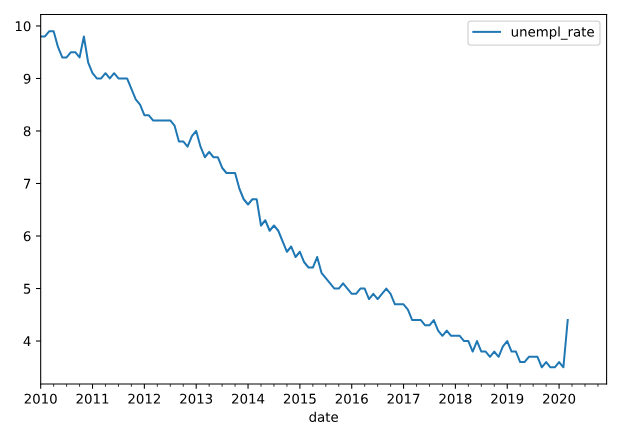


### Exercise
Using .melt() for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.

#### Instructions

Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.

Using the .query() method, select only those rows where metric equals close, and save to bond_perc_close.

Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.

Using dow_bond, plot only the Dow and bond values.

```python

# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query("metric == 'close'")

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner',
                            suffixes=('_dow', '_bond'))


# Plot only the close_dow and close_bond columns
dow_bond.plot(x='date', y=['close_dow', 'close_bond'], rot=90)
plt.show()

```

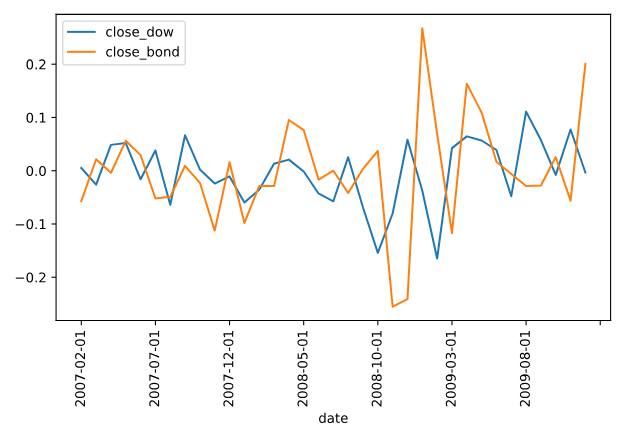

# Course wrap-up — Joining Data with `pandas`


---

# Course Wrap-up — Joining Data with `pandas`

---


* **Meaning:** This wrap-up recaps what you learned: merging basics, different join types, concatenation, verifying integrity, ordered/time-series merges, and reshaping with `.melt()`.

---

## 1 — Data merging basics

**Topics covered:** `merge()` (default inner join), one-to-one vs one-to-many, merging multiple tables

### Example: inner join with `.merge()`

```python
import pandas as pd

# left table: employees
employees = pd.DataFrame({
    'employee_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})

# right table: departments
departments = pd.DataFrame({
    'employee_id': [1, 2, 4],
    'department': ['HR', 'IT', 'Finance']
})

# inner join on employee_id
merged_df = employees.merge(departments, on='employee_id')
print(merged_df)
```

**Expected output:**

```
   employee_id   name department
0            1  Alice        HR
1            2    Bob        IT
```

**Line-by-line explanation**

* `import pandas as pd`

  * *What:* Loads pandas library and aliases it `pd`.
  * *Why:* Needed to create DataFrames and use `merge`.
  * *Output:* none (imports).
* `employees = pd.DataFrame({...})`

  * *What:* Creates a DataFrame named `employees` with two columns.
  * *Why:* Example left table for merging.
  * *Output:* DataFrame with 3 rows (id 1,2,3).
* `departments = pd.DataFrame({...})`

  * *What:* Creates a DataFrame named `departments` with two columns.
  * *Why:* Example right table; note `employee_id=4` has no match in `employees`.
  * *Output:* DataFrame with rows for ids 1,2,4.
* `merged_df = employees.merge(departments, on='employee_id')`

  * *What:* Performs an **inner join** by default on the `employee_id` column.
  * *Why:* To get rows where `employee_id` appears in both DataFrames.
  * *Expected output/result:* A DataFrame with only employee IDs present in **both** tables (1 and 2).
* `print(merged_df)`

  * *What:* Prints the merged DataFrame.
  * *Why:* To inspect the result.
  * *Meaning:* Row 3 (Charlie) is dropped because no department; row 4 (Finance) is dropped because employee not present.

**Insight:** inner join returns intersection of rows that match on the key(s).

---

## 2 — Merging tables with different join types

**Topics covered:** left, right, outer joins; merging a table to itself; merging on indexes

### Left / Right / Outer join examples (same toy data)

```python
# left join: keep all rows from employees
left_joined = employees.merge(departments, on='employee_id', how='left')
print(left_joined)

# right join: keep all rows from departments
right_joined = employees.merge(departments, on='employee_id', how='right')
print(right_joined)

# outer join: keep all rows from both
outer_joined = employees.merge(departments, on='employee_id', how='outer')
print(outer_joined)
```

**Expected output:**

**Left join**

```
   employee_id     name department
0            1    Alice        HR
1            2      Bob        IT
2            3  Charlie       NaN
```

**Right join**

```
   employee_id   name department
0            1  Alice        HR
1            2    Bob        IT
2            4    NaN   Finance
```

**Outer join**

```
   employee_id     name department
0            1    Alice        HR
1            2      Bob        IT
2            3  Charlie       NaN
3            4      NaN   Finance
```

**Line-by-line explanation**

* `employees.merge(..., how='left')`

  * *What:* Keep all rows from the **left** DataFrame (`employees`), add matching `departments` columns when present.
  * *Why:* When left table is the primary list (e.g., master records), and you want additional info if available.
  * *Result meaning:* Charlie appears with `NaN` for `department`.
* `how='right'` and `how='outer'` similarly: `right` keeps all from right table; `outer` keeps all rows from both.

---

### Merging a table to itself (self-join) — example: sequels

```python
sequels = pd.DataFrame({
    'id': [862, 863, 10193, 19995],
    'title': ['Toy Story', 'Toy Story 2', 'Toy Story 3', 'Avatar'],
    'sequel': [863, 10193, None, None]
})

# Merge sequels to itself: match left.sequel == right.id
original_sequels = sequels.merge(
    sequels,
    left_on='sequel',
    right_on='id',
    suffixes=('_org', '_seq')
)

# show original and sequel titles
print(original_sequels[['title_org', 'title_seq']])
```

**Expected output:**

```
       title_org     title_seq
0     Toy Story   Toy Story 2
1   Toy Story 2   Toy Story 3
```

**Line-by-line explanation**

* `sequels = pd.DataFrame(...)`

  * *What:* Create a table where `sequel` references another row's `id`.
  * *Why:* Example of hierarchical/sequential relationship.
* `.merge(... left_on='sequel', right_on='id')`

  * *What:* Merge the table with itself by matching the `sequel` value in the left copy to the `id` in the right copy.
  * *Why:* To get original + sequel info on one row.
  * *Result:* Rows where a sequel exists are matched; movies without sequels are not returned (inner match).
* `suffixes=('_org','_seq')`

  * *Why:* To disambiguate column names originating from each copy.

**Insight:** Self-joins are very useful for hierarchical or sequential relationships (manager/employee, previous/next events).

---

### Merge on indexes (example)

You can merge using index levels. Example: `movies` uses its `id` as index, `taglines` has `id` as a column.

```python
movies = pd.DataFrame({
    'id': [257, 14290, 38365],
    'title': ['Oliver Twist', 'Better Luck', 'Grown Ups'],
    'popularity': [20.415572, 3.877036, 38.864027]
}).set_index('id')

taglines = pd.DataFrame({
    'id': [257, 38365],
    'tagline': [None, 'Boys will be boys...']
})

# merge using left_index (movies.index) and right_on (taglines.id)
movies_taglines = movies.merge(taglines, left_index=True, right_on='id', how='left')
print(movies_taglines)
```

**Expected output:**

```
                title    popularity     id             tagline
id
257      Oliver Twist     20.415572   257               None
14290    Better Luck       3.877036  14290               NaN
38365    Grown Ups        38.864027  38365  Boys will be boys...
```

**Explanation**

* `set_index('id')` sets `movies` index to `id`.
* `merge(... left_index=True, right_on='id')` tells pandas to use the left object's index and the right object's `id` column as merge keys.

---

## 3 — Advanced merging and concatenating

**Topics covered:** filtering joins (semi & anti), `.concat()`, verifying integrity

### Semi-join (filter left table to rows that have matches in right table)

```python
genres = pd.DataFrame({'gid': [1, 2, 3, 4, 5], 'name': ['Rock','Jazz','Metal','Pop','Blues']})
top_tracks = pd.DataFrame({'tid': [2260, 2933, 2618], 'gid': [1, 1, 1]})

# Step 1: inner merge to find which gids appear in top_tracks
genres_tracks = genres.merge(top_tracks, on='gid')
print("genres_tracks (inner merge):")
print(genres_tracks)

# Step 2: semi-join result: keep rows from genres whose gid appears in genres_tracks
top_genres = genres[genres['gid'].isin(genres_tracks['gid'])]
print("\nTop genres (semi-join result):")
print(top_genres)
```

**Expected output:**

```
genres_tracks (inner merge):
   gid   name   tid
0    1   Rock  2260
1    1   Rock  2933
2    1   Rock  2618

Top genres (semi-join result):
   gid  name
0    1  Rock
```

**Line-by-line explanation**

* `genres.merge(top_tracks, on='gid')`

  * *What:* Inner join to see rows where `gid` appears in both.
  * *Why:* Identify which genres have top tracks.
* `genres[genres['gid'].isin(genres_tracks['gid'])]`

  * *What:* Keep rows from `genres` where `gid` is among those found in `genres_tracks`.
  * *Why:* That is the semi-join behavior — only left-table columns are kept, filtered by existence in right table.

---

### Anti-join (rows in left table that **do not** have matches in right table)

```python
# Step 1: left merge with indicator to mark source
genres_tracks = genres.merge(top_tracks, on='gid', how='left', indicator=True)
print(genres_tracks.head())

# Step 2: find gids that are left-only (no match in top_tracks)
gid_list = genres_tracks.loc[genres_tracks['_merge'] == 'left_only', 'gid']
print("\nGIDs only in genres (no top tracks):")
print(gid_list.tolist())

# Step 3: select non-top genres
non_top_genres = genres[genres['gid'].isin(gid_list)]
print("\nNon-top genres (anti-join result):")
print(non_top_genres)
```

**Expected output (example):**

```
   gid   name    tid      _merge
0    1   Rock  2260.0        both
1    2   Jazz     NaN  left_only
2    3  Metal     NaN  left_only
3    4   Pop      NaN  left_only
4    5  Blues     NaN  left_only

GIDs only in genres (no top tracks):
[2, 3, 4, 5]

Non-top genres (anti-join result):
   gid   name
1    2   Jazz
2    3  Metal
3    4    Pop
4    5  Blues
```

**Explanation**

* `indicator=True` adds a `_merge` column with `'left_only'`, `'right_only'`, or `'both'`.
* Selecting `_merge == 'left_only'` gives the keys that appear only in left table (genres), i.e., an anti-join.

---

### Concatenating vertically with `.concat()`

```python
inv_jan = pd.DataFrame({'iid': [1,2,3], 'cid': [2,4,8], 'invoice_date': ['2009-01-01','2009-01-02','2009-01-03'], 'total': [1.98,3.96,5.94]})
inv_feb = pd.DataFrame({'iid': [7,8,9], 'cid': [38,40,42], 'invoice_date': ['2009-02-01','2009-02-01','2009-02-02'], 'total': [1.98,1.98,3.96]})
inv_mar = pd.DataFrame({'iid': [14,15,16], 'cid': [17,19,21], 'invoice_date': ['2009-03-04','2009-03-04','2009-03-05'], 'total': [1.98,1.98,3.96]})

# Basic concatenation (default keeps original indexes)
concat_default = pd.concat([inv_jan, inv_feb, inv_mar])
print(concat_default)

# Ignore index
concat_ignore = pd.concat([inv_jan, inv_feb, inv_mar], ignore_index=True)
print("\nIgnore index:")
print(concat_ignore)

# Add keys to create a hierarchical index showing origin
concat_keys = pd.concat([inv_jan, inv_feb, inv_mar], keys=['jan','feb','mar'])
print("\nConcatenated with keys (MultiIndex):")
print(concat_keys)
```

**Expected output (summarized):**

```
   iid  cid invoice_date  total
0    1    2  2009-01-01   1.98
1    2    4  2009-01-02   3.96
2    3    8  2009-01-03   5.94
0    7   38  2009-02-01   1.98
1    8   40  2009-02-01   1.98
2    9   42  2009-02-02   3.96
0   14   17  2009-03-04   1.98
...

Ignore index:
   iid  cid invoice_date  total
0    1    2  2009-01-01   1.98
1    2    4  2009-01-02   3.96
2    3    8  2009-01-03   5.94
3    7   38  2009-02-01   1.98
4    8   40  2009-02-01   1.98
5    9   42  2009-02-02   3.96
6   14   17  2009-03-04   1.98
...

Concatenated with keys (MultiIndex):
           iid  cid invoice_date  total
jan 0        1    2  2009-01-01   1.98
    1        2    4  2009-01-02   3.96
    2        3    8  2009-01-03   5.94
feb 0        7   38  2009-02-01   1.98
    1        8   40  2009-02-01   1.98
mar 0       14   17  2009-03-04   1.98
...
```

**Line-by-line explanation**

* `pd.concat([...])` stacks DataFrames **vertically** by default (axis=0).
* `ignore_index=True` reassigns new sequential index (0..n-1).
* `keys=[...]` creates a hierarchical (MultiIndex) where the top-level labels show the original table—useful to trace origin.

**Verify integrity example (overlapping index error)**

```python
# Suppose inv_feb had index value 9 and inv_mar also has index value 9
# Then pd.concat(..., verify_integrity=True) would raise:
# ValueError: Indexes have overlapping values: Int64Index([9], dtype='int64', name='iid')
```

* `verify_integrity=True` checks whether the concatenated index has duplicates and raises an error if so.
* *Why:* Detect accidental duplicate keys when index matters (e.g., invoice id).

---

## 4 — Merging ordered and time-series data

**Topics covered:** `merge_ordered()`, `merge_asof()`, forward-fill (`ffill`), when to use them.

### `merge_ordered()` example (stock data)

* Use `merge_ordered` for ordered/time-series merges; default `how='outer'` and results are sorted by the key.

```python
aapl = pd.DataFrame({
    'date': ['2007-02-01','2007-03-01','2007-04-01','2007-05-01','2007-06-01'],
    'close': [12.087143,13.272857,14.257143,17.312857,17.434286]
})
mcd = pd.DataFrame({
    'date': ['2007-01-01','2007-02-01','2007-03-01','2007-04-01','2007-05-01'],
    'close': [44.349998,43.689999,45.049999,48.279999,50.549999]
})

merged_ordered = pd.merge_ordered(aapl, mcd, on='date', suffixes=('_aapl','_mcd'))
print(merged_ordered)
```

**Expected output:**

```
         date  close_aapl  close_mcd
0  2007-01-01         NaN   44.349998
1  2007-02-01   12.087143   43.689999
2  2007-03-01   13.272857   45.049999
3  2007-04-01   14.257143   48.279999
4  2007-05-01   17.312857   50.549999
5  2007-06-01   17.434286         NaN
```

**Line-by-line explanation**

* `pd.merge_ordered(aapl, mcd, on='date', suffixes=(...))`

  * *What:* Outer-merged table (by default), sorted by `date`.
  * *Why:* Keep all time points from both series in order — helpful for time-series alignment.
  * *Result:* Where one series lacks a date, its value is `NaN`.

### Forward-fill (fill missing values from previous rows)

```python
merged_ffill = pd.merge_ordered(aapl, mcd, on='date', suffixes=('_aapl','_mcd'), fill_method='ffill')
print(merged_ffill)
```

**Expected output (difference: last row `close_mcd` filled):**

```
         date  close_aapl  close_mcd
0  2007-01-01         NaN   44.349998
1  2007-02-01   12.087143   43.689999
2  2007-03-01   13.272857   45.049999
3  2007-04-01   14.257143   48.279999
4  2007-05-01   17.312857   50.549999
5  2007-06-01   17.434286   50.549999   # close_mcd forward-filled from previous
```

**Why & meaning**

* `fill_method='ffill'` copies the previous non-null value forward to fill `NaN` — useful for carrying the last known price forward.

---

### `merge_asof()` example (nearest-key merge)

`merge_asof()` behaves like an ordered left-join but matches each left row to the **nearest** key on the right **less than or equal** (by default). The key columns must be sorted.

```python
visa = pd.DataFrame({
    'date_time': pd.to_datetime(['2017-11-17 16:00:00','2017-11-17 17:00:00','2017-11-17 18:00:00']),
    'close': [110.32, 110.24, 110.065]
})

ibm = pd.DataFrame({
    'date_time': pd.to_datetime([
        '2017-11-17 15:55:10','2017-11-17 16:00:03','2017-11-17 16:05:06',
        '2017-11-17 16:15:30'
    ]),
    'close': [149.11, 149.25, 149.51757, 149.59]
})

merged_asof = pd.merge_asof(visa, ibm, on='date_time', suffixes=('_visa','_ibm'))
print(merged_asof)
```

**Expected output (illustrative):**

```
            date_time  close_visa  close_ibm
0 2017-11-17 16:00:00     110.320   149.11
1 2017-11-17 17:00:00     110.240   149.59
2 2017-11-17 18:00:00     110.065   149.59
```

**Explanation**

* For `2017-11-17 16:00:00`, the matching IBM time chosen is the last record <= 16:00:00 (149.11 at 15:55:10).
* For later Visa times, `merge_asof` picks the closest previous IBM timestamps.

**Direction argument**

* `direction='backward'` (default): match right row with `key <= left_key`.
* `direction='forward'`: match right row with `key >= left_key`.
* `direction='nearest'`: match nearest (forward or backward).

**Example (forward direction):**

```python
merged_asof_forward = pd.merge_asof(visa, ibm, on='date_time', suffixes=('_visa','_ibm'), direction='forward')
print(merged_asof_forward)
```

**Meaning:** Use `forward` if you want the first available right-side measurement **after** the left timestamp — useful in some causal/time-aware datasets.

---

## 5 — Reshaping data: `.melt()`

**Topic:** convert **wide** to **long** format (unpivot)

### Example: `.melt()` basic

```python
social_fin = pd.DataFrame([
    {'financial': 'total_revenue', 'company': 'twitter', '2019': 3459329, '2018': 3042359, '2017': 2443299, '2016': 2529619},
    {'financial': 'gross_profit',  'company': 'twitter', '2019': 2322288, '2018': 2077362, '2017': 1582057, '2016': 1597379},
    {'financial': 'net_income',    'company': 'twitter', '2019': 1465659, '2018': 1205596, '2017': -108063, '2016': -456873},
    {'financial': 'total_revenue', 'company': 'facebook','2019': 70697000,'2018': 55838000,'2017': 40653000,'2016': 27638000},
])

# Melt all year columns into long format
social_fin_tall = social_fin.melt(id_vars=['financial','company'])
print(social_fin_tall.head(10))
```

**Expected output (first rows):**

```
     financial  company variable    value
0  total_revenue twitter     2019  3459329
1   gross_profit twitter     2019  2322288
2     net_income twitter     2019  1465659
3  total_revenue facebook    2019 70697000
4   gross_profit facebook    2019 57927000
5     net_income facebook    2019 18485000
6  total_revenue twitter     2018  3042359
7   gross_profit twitter     2018  2077362
8     net_income twitter     2018  1205596
9  total_revenue facebook    2018 55838000
```

**Line-by-line explanation**

* `social_fin.melt(id_vars=['financial','company'])`

  * *What:* Unpivots the year columns (2019,2018,2017,2016) into two columns: `variable` and `value`.
  * *Why:* Convert wide table (years as columns) into long/tidy format (one row per financial-company-year), which is easier for many analyses and plotting.

### Melt with `value_vars` and custom names

```python
# only unpivot selected year columns and rename variable/value columns
social_fin_tall2 = social_fin.melt(
    id_vars=['financial','company'],
    value_vars=['2018','2017'],
    var_name='year',
    value_name='dollars'
)
print(social_fin_tall2.head(8))
```

**Expected output (first rows):**

```
     financial  company  year    dollars
0  total_revenue twitter   2018  3042359
1   gross_profit twitter   2018  2077362
2     net_income twitter   2018  1205596
3  total_revenue facebook  2018 55838000
4   gross_profit facebook  2018 46483000
5     net_income facebook  2018 22112000
6  total_revenue twitter   2017  2443299
7   gross_profit twitter   2017  1582057
```

**Meaning**

* `value_vars` controls which columns are unpivoted and in what order.
* `var_name` and `value_name` rename the generated columns for readability.

---

## 6 — Key course summary (what you should now be able to do)

* **Basic merging**: use `.merge()` (inner by default) to combine tables on key columns.
* **Multiple join types**: `how='left'`, `'right'`, `'outer'` control which rows are preserved.
* **Self-joins & index joins**: use `left_on/right_on` or `left_index/right_index`.
* **Filtering joins**: implement semi and anti joins using `merge(... indicator=True)` and `isin`.
* **Concatenation**: `pd.concat()` for vertical (or horizontal) stacking; `ignore_index`, `keys`, `verify_integrity`.
* **Ordered/time merges**: `pd.merge_ordered()` for sorted outer merges; `pd.merge_asof()` for nearest/forward/backward time alignment.
* **Reshaping**: `df.melt()` converts wide data to tidy/long format.

---

## 7 — Thank you!

* **Transcript closing:** Thanks and good luck continuing your learning journey.

---

### Final notes / recommendations

* Use **small toy DataFrames** (like the examples above) to **experiment** and confirm you understand the behavior of each join type.
* Always inspect `.shape`, `.head()`, and `df.columns` after merging to ensure you got the expected structure.
* When working with indexes, confirm whether the merge keys are in columns or index levels and use `left_index` / `right_index` appropriately.
* For time-series merging, ensure your key columns are **sorted** before using `merge_ordered()` or `merge_asof()`.

---

